In [1]:
from assets.specs import startupOption, pdfshowOption
from assets.pdfshow import pdfGet
from assets.startup import initialize
pdfshowOption['mini'] = False
startupOption['debug'] = True
initialize()

<IPython.core.display.Javascript object>

$\newcommand{\mbb}[1]{\mathbb{#1}}
\newcommand{\mrm}[1]{\mathrm{#1}}
\newcommand{\mcal}[1]{\mathcal{#1}}
\newcommand{\tup}[1]{\textup{#1}}
\newcommand{\idty}{\mathds{1}}
%Specials
\newcommand{\hodgedual}{\operatorname{\star}}
\newcommand{\dual}{\ \xlongleftrightarrow{\ \textrm{dual}\ }\ }
\newcommand{\pdd}[1]{\operatorname{\partial_{\mathnormal{#1}}}}
\newcommand{\abs}[1]{\left|#1\right|}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\pqty}[1]{\left(#1\right)}
\renewcommand{\idty}{\mathbf{1}}
\newcommand{\dd}[1]{\operatorname{d} #1}
\newcommand{\dv}[2]{\frac{\dd{#1}}{\dd{#2}}}
\newcommand{\pdv}[2]{\frac{\partial{#1}}{\partial{#2}}}
$`< Utilities initialized >`
```python
matplotlib_notebook, display_whitespace, clear_output, InlinePager, show_docstring, get_methods, goodbye```

### README
> 姓名：Bryan &nbsp;&nbsp; 学号：1500066666
>
> ** 请首先阅读该目录下的 `README.md` 文档！** <br/>
> ** 完整运行本文档需要大概 `30 sec` ! **<br/>
>
> *测试环境：**IPython 3.6.4 ( > 3.6 REQUIRED! ),** CPU freq ~ 2.70 GHz (max, turbo) x 4 cores, intel, integrated graphics, SSD.*
>
>---
>
> 助教老师好～ 本人不用 `\usepackage` 无法生存 <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/d_erha.png" width="24px" />, 但又难以拒绝 jupyter 的交互式环境，于是捣鼓出了一个解决方案：先用 (Xe) $\mathrm{\LaTeX}$ 编译成 PDF, 再用 [PDF.js](https://github.com/mozilla/pdf.js/) 嵌入到此文档当中。
>
> **若想运行文档中的代码，务必先 `restart & run all` , 然后再刷新一下。**
>
> 相应的实现过程与格式优化置于 `assets/` 目录内，不属于作业的核心内容。若 PDF.js 不能正常调用，可以尝试 mini 模式；只需将上面初始化单元中的 `mini` 选项改为 `True` 即可：
```python
pdfshow_option['mini'] = True
```
此时 PDF 将由浏览器的内置阅读器打开。这样显示的 PDF 将被限制在一定高度的输出框内，无法展开；`exN_mini.html` 即在此模式下生成。
此外，文中的理论分析整合为文档：[`document.pdf`](latex/document.pdf), 便于打印、独立阅读。另有一选项：
```python
startupOption['debug'] = True
```
将启用 `%autoreload 2` 功能，即在运行时动态重载外部模块，以随时反映其变动。
>
> ----------------
> 另外，本次作业中的部分代码与作业核心内容关系紧密，但终究不是重点；这些代码要么来源于前面的作业、要么是函数作图命令（`matplotlib` 的一些操作）等等。它们往往冗长而无趣，故隐于 module 当中；它们位于目录 `pycode/` 之下。
>
> 核心代码均显示在了文档当中，但实际也多是自成 module, 通过 pager `some_function??` 显示；这里采用了[一个 hack](http://nbviewer.jupyter.org/gist/minrk/7715212), 使 pager 显示在行内。如果觉得太长碍事，只需将 `some_function??` 注释掉即可。在前面的初始化单元之 `assets.startup` 中，已通过命令：
```python
sys.path.append('pycode')
```
将引用目录加入到了 `sys.path` 当中，因此下文中的引用并未出现 `pycode` 前缀。初始化选项置于 `assets.specs` 中，通过 magic `%run` 直接在本文档 namespace 中运行。
>
> ----------------
> 此外，本人刚入门 python, js 和 css 也是现学的，上述系统（以及下面的作业）显然还有许多 bug, 如使用 PDF.js 时无法导出 html 文档（因违背浏览器安全策略——不允许 js 访问 `file://` 协议）；此处只得暂时搁置，由此造成的麻烦，本人深表歉意...
>
> 万分感谢～

In [2]:
pdfGet('latex/sections/0.title.pdf').show()

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
from IPython.display import display, HTML, Markdown, Image

# If u DON'T HAVE LaTeX, change this to `False`!
# But it would look much better if LaTeX is deployed...
tex_status = True
plt.rc('text', usetex=tex_status)
pager = InlinePager()

## 直观图像
一维随机行走实现如下：

In [4]:
# Native impletementation
from random_walk import random_walk
pager.extract('random_walk', tag='walk')

```
*** Excerpt, tag: <walk> ```

    # <walk>
    for i in range(steps):
        # [0, 1) random reals for each walker
        rand_array = np.random.random_sample(walkers_count)
        for j in range(walkers_count):
            randnum = rand_array[j]
            if randnum < prob_l:  # Walk left
                walkers[j] -= 1
            elif randnum >= 1 - prob_r:  # Walk right
                walkers[j] += 1
            else:  # Stay
                stays_count += 1
        # </walk>


```
*** Excerpt, tag: <walk> ```

结果如图：

Steps: 900


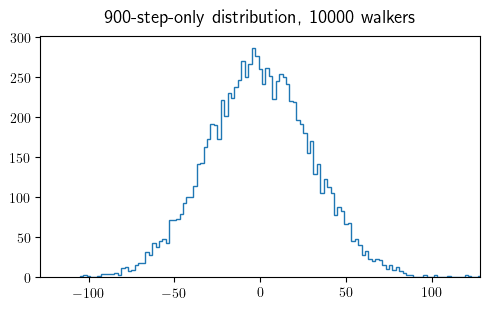

In [5]:
from random_walk import RandomWalkers
rand_walkers = RandomWalkers(1e4, left=.5, right=.5)
rand_walkers.walk(900)
rand_walkers.hist(bin_width=2)

使用直方图显示 walker 的分布时，出现了一个有趣的现象：若划分区间（bin）的宽度 `bin_width = 1, 3, ...` 为奇数，直方图中将出现振荡行为。这是因为，900 步行走后的终点只分布在偶数点处，因此取 `bin_width = 2` 较为合理。如取 `bin_width = 3`, 一半的 bin 中包含两个奇数点，故占据数较小；而另一半的 bin 中包含单个奇数点，故占据数较大，如下所示：

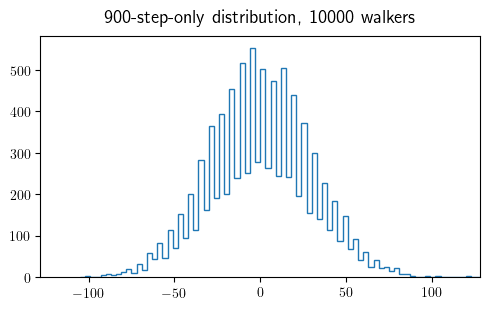

In [6]:
rand_walkers.hist(bin_width=3)

*还是挺漂亮的～*

程序实现中允许赋予 walker 呆着不动（stay）的可能性，只需取 `prob_l + prob_r < 1` 即可；若有极小的可能性呆着不动，则 walker 将有小概率最终抵达奇数点处，如下：

# of stays: 898
Steps: 900


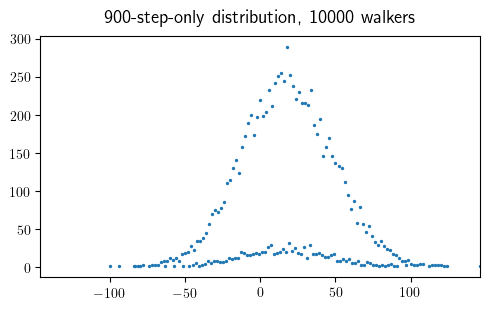

In [7]:
rand_walkers = RandomWalkers(1e4, left=.4899, right=.51)
rand_walkers.walk(900)
rand_walkers.plot()

*<small><del>我买几个橘子去。你就在此地，不要走动。</del></small>*

表观上出现两条分布曲线，上曲线为偶数点处的贡献，下为奇数点处的贡献；没动的次数打印为 `# of stays`. 上图同时还展示了左右概率不等时向右运动的偏向性。

---

不难发现，这里得到的概率分布与[讲义上的](http://www.phy.pku.edu.cn/~qiangli/CP2018Exercise.pdf#page=5)不尽相同，在原点处没有不连续的尖峰；这是因为，两者的定义相异。事实上，讲义上的概率分布是再在时域上积分后的结果，等价于，允许 walker 走*任意 $\le 900$ 步*，各种步数等概率。也就是说，全程呆着不动的概率和走 900 步的概率是一样的。程序上，这一统计方法以 `integrated` 选项标记，实现如下：

In [8]:
pager.extract('random_walk', tag='integrated')

```
*** Excerpt, tag: <integrated> ```

        # <integrated>
        if summary.size != 0:
            for j in range(walkers_count):
                summary[center_index + walkers[j]] += 1
            # </integrated>


```
*** Excerpt, tag: <integrated> ```

沿用前述的非对称设定，结果如下：

Prob: left 0.4899 right 0.51 
---
Initiate integrated mode; start from zero.
# of stays: 920
Steps: 900


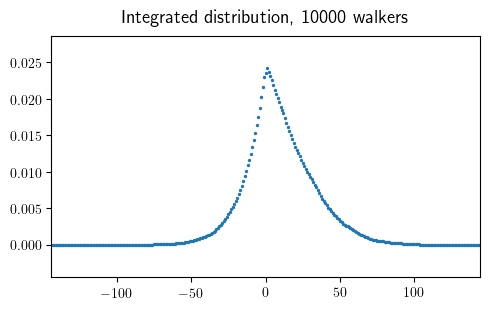

In [9]:
print(
    'Prob: left', rand_walkers.p_left,
    'right', rand_walkers.p_right, '\n---'
)
rand_walkers.walk(900, integrated=True)
rand_walkers.plot(integrated=True, normalize=True)

采用标准的对称参数，结果如下：

Steps: 900


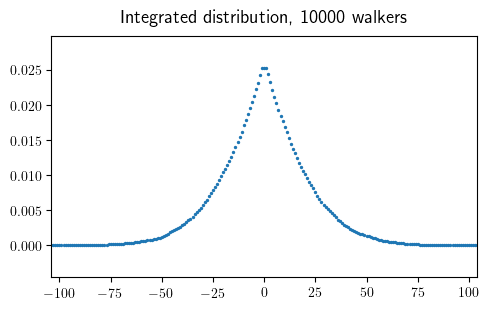

In [10]:
rand_walkers = RandomWalkers(1e4, left=.5, right=.5)
rand_walkers.walk(900, integrated=True)
rand_walkers.plot(integrated=True, normalize=True)

与参考结果一致。
## 统计分析
简单起见，考虑走 100 步的情形（不允许 $<100$ 步），结果的方差与均值如下：

Steps: 100


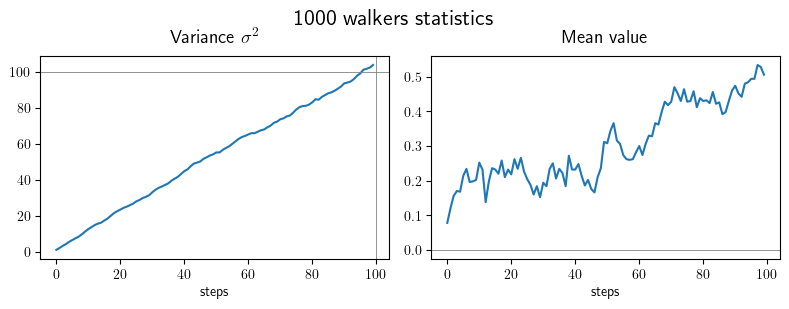

In [11]:
rand_walkers = RandomWalkers(1e3, left=.5, right=.5)
rand_walkers.walk(100)
rand_walkers.stats_plot()

注意，计算方差时采用了无偏估计，即分母为 (`walkers_count` $- 1$). 增大样本数目：

Steps: 100


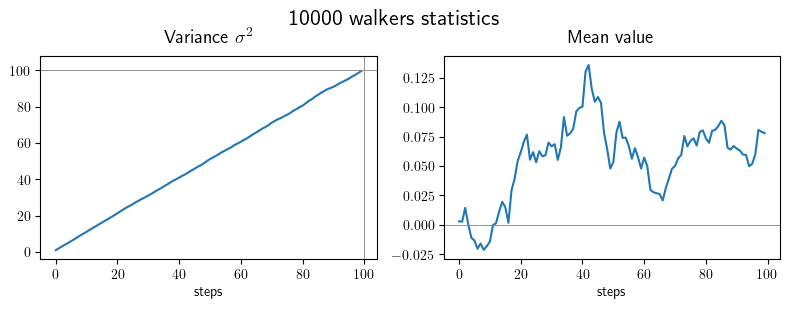

In [12]:
rand_walkers = RandomWalkers(1e4, left=.5, right=.5)
rand_walkers.walk(100)
rand_walkers.stats_plot()

可见涨落几乎被抹平，有 $\sigma^2 \sim$ `steps`, 均值 $\sim 0$. 同样可以尝试非对称的情况，有：

Steps: 100


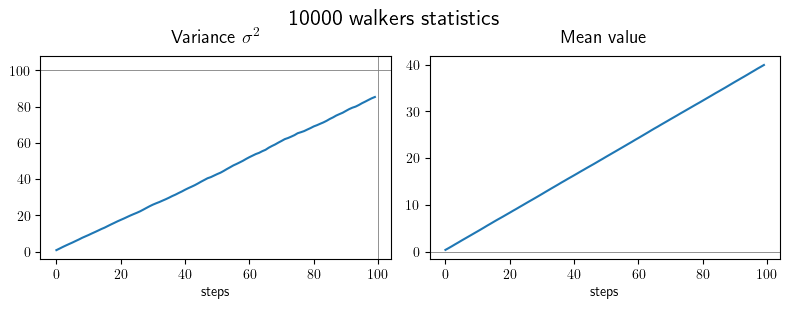

In [13]:
rand_walkers = RandomWalkers(1e4, left=.3, right=.7)
rand_walkers.walk(100)
rand_walkers.stats_plot()

可见方均根增长放缓，且均值出现显著的偏向性。若允许不动呢？

# of stays: 199468
Steps: 100


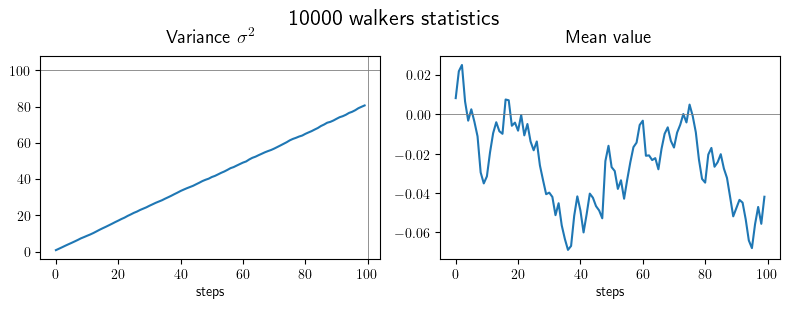

In [14]:
rand_walkers = RandomWalkers(1e4, left=.4, right=.4)
rand_walkers.walk(100)
rand_walkers.stats_plot()

这里每一步均有 20% 的概率呆着不动，同样可见方均根的增长变缓，但依然线性依赖于步数。<br/>
事实上，方均根可视为体系混乱度（熵）的一种描述；呆着不动或有偏向性地行走，其结果都不如左右各 50% 概率时来得混乱，故有上述结果。

**补充：细致分析如下：**

In [15]:
pdfGet('latex/sections/1.random_walk_variance.pdf').show()

<IPython.core.display.Javascript object>

In [16]:
goodbye('ex6')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook ex6.ipynb to script
